In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("../data/cleaned_data.csv", index_col=0)
df.head()

,Author,Year,User Rating,Reviews,Name,Price,Genre
0,Abraham Verghese,2010,4.6,4866,Cutting for Stone,11.0,Fiction
1,Abraham Verghese,2011,4.6,4866,Cutting for Stone,11.0,Fiction
2,Adam Gasiewski,2017,4.4,3113,Milk and Vine: Inspirational Quotes From Class...,6.0,Non Fiction
3,Adam Mansbach,2011,4.8,9568,Go the F**k to Sleep,9.0,Fiction
4,Adir Levy,2019,4.8,8170,What Should Danny Do? (The Power to Choose Ser...,13.0,Fiction


<Axes: xlabel='Price', ylabel='Count'>

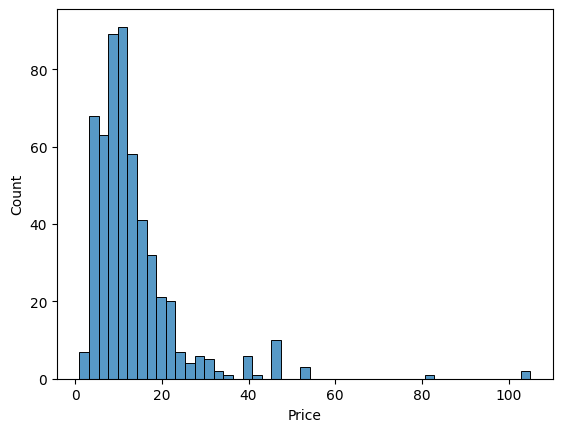

In [3]:
# Wie sind eigentlich die Preise verteilt

sns.histplot(df, x="Price")

### Wie sind die Autoren verteilt?

<Axes: xlabel='count', ylabel='Count'>

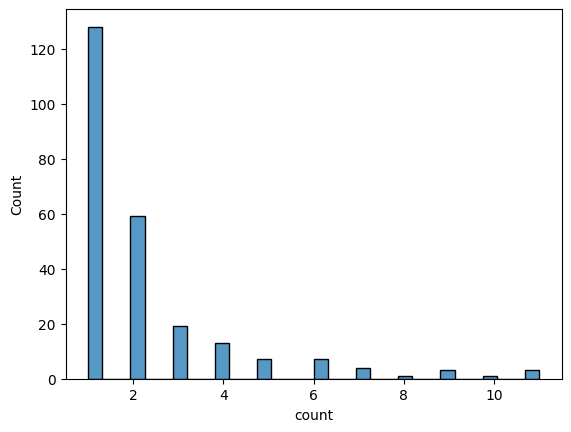

In [4]:


author_counts = df["Author"].value_counts()
author_counts = author_counts.reset_index()

sns.histplot(author_counts, x="count")

### Welche Autoren tauchen am häufigsten auf?

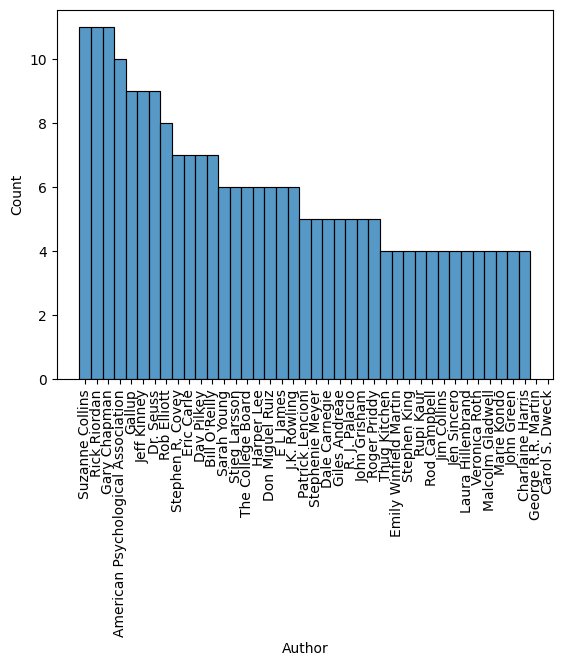

In [5]:
# Welche Autoren haben die meisten listings
# Welche Autoren tauchen am häufigsten auf?
import matplotlib.pyplot as plt


author_counts = df['Author'].value_counts()

mask = df['Author'].isin(author_counts[author_counts > 3].index)

sorted_authors = author_counts.sort_values(ascending=False).index
df['Author'] = pd.Categorical(
    df['Author'], categories=sorted_authors, ordered=True)

sns.histplot(df[mask], x="Author")
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Year', ylabel='count'>

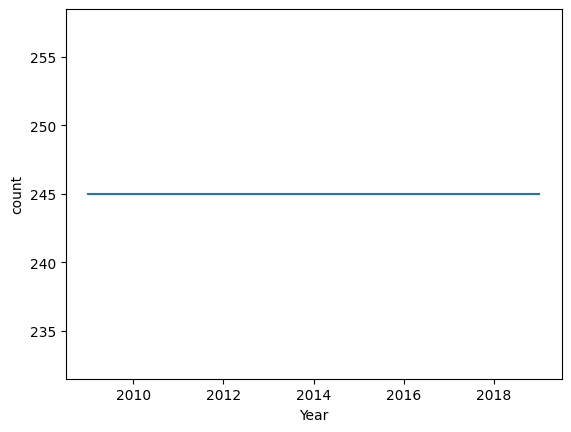

In [6]:
# Wie viele verschiedene Autoren sind je Jahr in den Top 50
import seaborn as sns

df_gorupby_author_year_count = df[["Author", "Year"]].groupby(
    "Year").value_counts().to_frame()


df_gorupby_author_year_count.reset_index(inplace=True)

df_gorupby_author_year_count["Year"].value_counts()

sns.lineplot(df_gorupby_author_year_count["Year"].value_counts())

### Wie haben sich die Buchpreise über die Jahre entwickelt?

<Axes: xlabel='Year', ylabel='Price'>

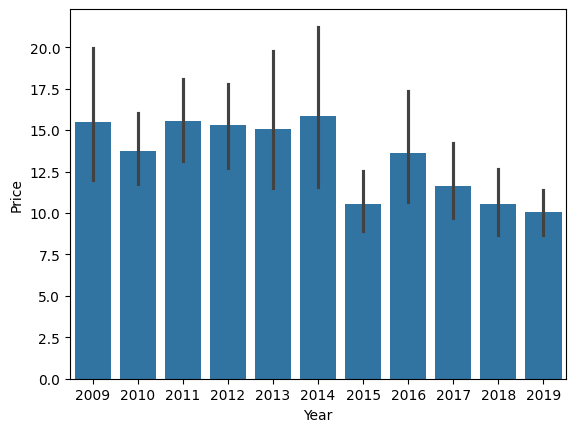

In [7]:
sns.barplot(data = df, y='Price', x='Year')

(0.0, 20.0)

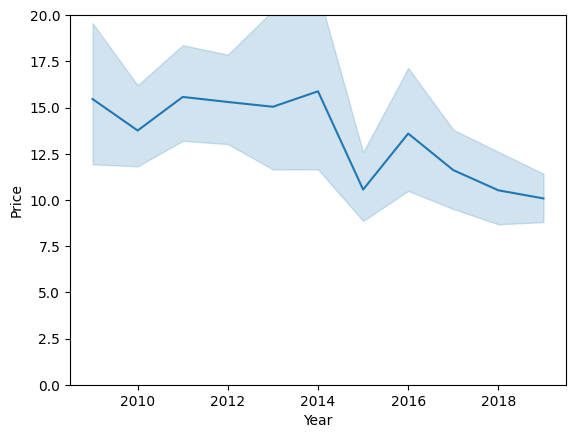

In [8]:
sns.lineplot(data = df, y='Price', x='Year')
plt.ylim([0,20])

### Welche Bücher tauchen am häufigsten auf?

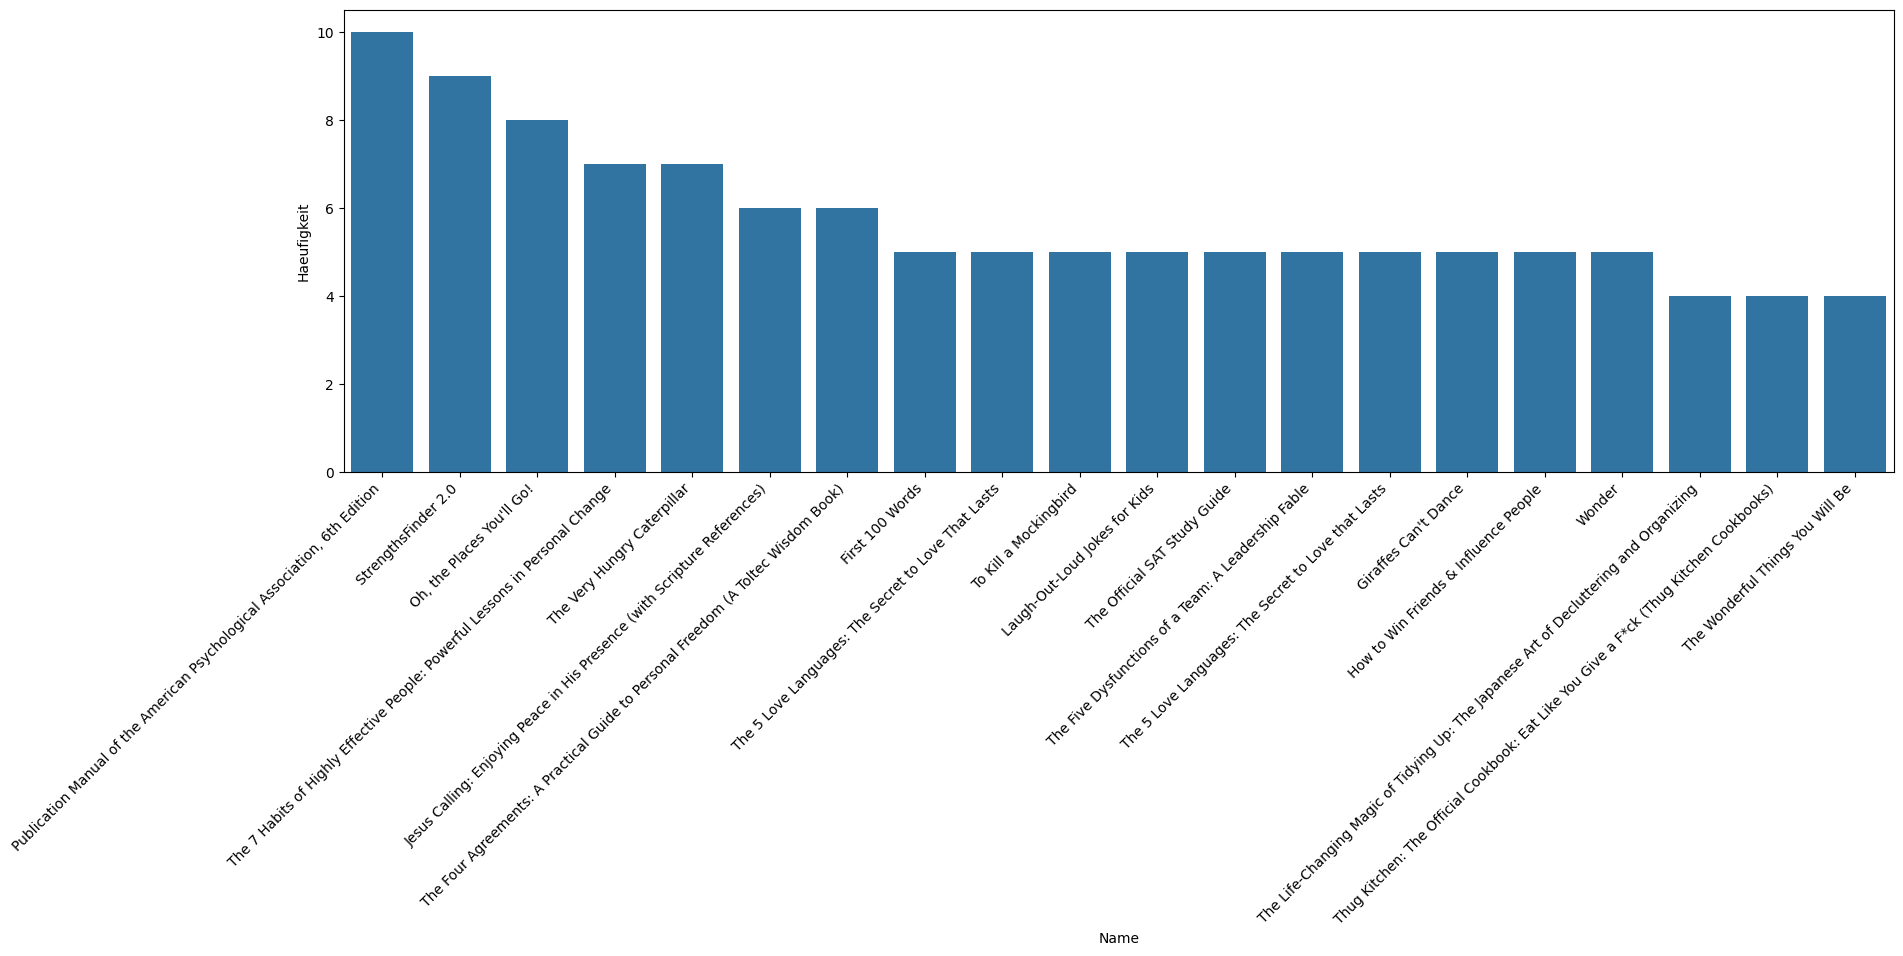

In [9]:
df_frequency_books = df.groupby("Name", as_index=False).agg(
    Haeufigkeit=("Name", "count")).sort_values("Haeufigkeit", ascending=False)
top_books = df_frequency_books.nlargest(20, "Haeufigkeit")

plt.figure(figsize=(20, 6))
sns.barplot(top_books, x="Name", y="Haeufigkeit")

plt.xticks(rotation=45, ha="right")
plt.show()

#### Welches Genre ist beliebter? War das schon immer so?

In [10]:
import plotly.express as px


genre = df.groupby('Year', as_index=False)['Genre'].value_counts().sort_values(by='Year')


px.bar(
    genre,
    x='Year',
    y='count',
    color='Genre',
    barmode='group'
)


### Wie sid die Reviews verteilt?

<Axes: xlabel='Reviews', ylabel='Count'>

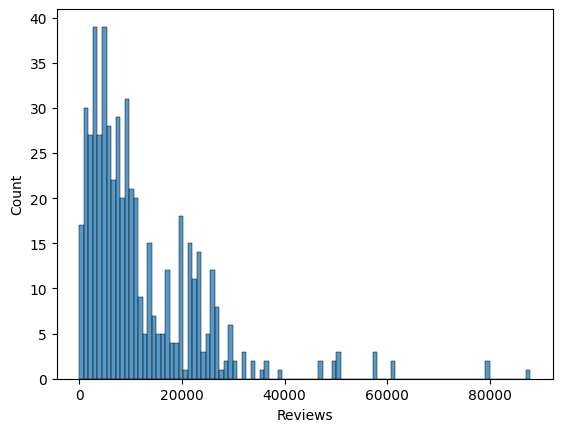

In [11]:
sns.histplot(df, x="Reviews", bins=100)

<Axes: xlabel='User Rating', ylabel='Reviews'>

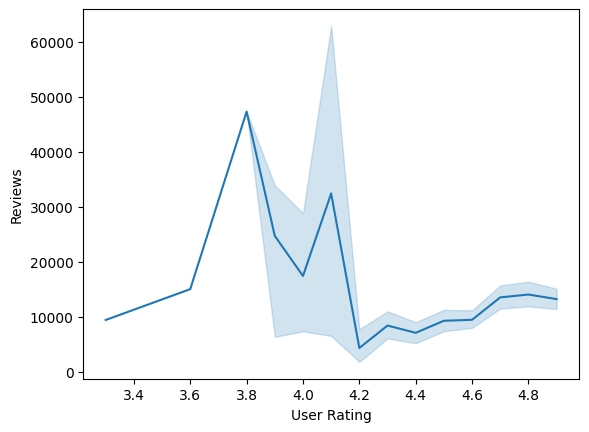

In [12]:
sns.lineplot(df, x="User Rating", y="Reviews")

In [13]:
review_verteilung = df[["User Rating", "Reviews"]].groupby("User Rating").sum()
display(review_verteilung)

px.bar(review_verteilung)

,Reviews
User Rating,
3.3,9372
3.6,14982
3.8,94530
3.9,73998
4.0,243266
4.1,194305
4.2,34268
4.3,209072
4.4,267481


In [14]:


# Gibt es einen Zusammenhang zwischen Anzahl an Reviews und der Häufigkeit der Bücher in den Top 50
# Wie sind die User Ratings verteilt?
# Gibt es einen Zusammenhang zwischen Preis und Anzahl der Reviews?
# Gibt es einen Zusammenhang zwischen User Rating und Reviews

#### Gibt es einen Zusammenhang zwischen Anzahl an Reviews und der Häufigkeit der Bücher in den Top 50

In [15]:
# plot zwischen häufigstem Titel und Reviews

In [16]:
df.head()

,Author,Year,User Rating,Reviews,Name,Price,Genre
0,Abraham Verghese,2010,4.6,4866,Cutting for Stone,11.0,Fiction
1,Abraham Verghese,2011,4.6,4866,Cutting for Stone,11.0,Fiction
2,Adam Gasiewski,2017,4.4,3113,Milk and Vine: Inspirational Quotes From Class...,6.0,Non Fiction
3,Adam Mansbach,2011,4.8,9568,Go the F**k to Sleep,9.0,Fiction
4,Adir Levy,2019,4.8,8170,What Should Danny Do? (The Power to Choose Ser...,13.0,Fiction


In [20]:
names_and_reviews = df.groupby("Name", as_index=False).agg(Reviews=("Reviews", "first"), 
                                       Count=("Name", "count"))\
                                           .sort_values(by="Count", ascending=False)
names_and_reviews

,Name,Reviews,Count
185,Publication Manual of the American Psychologic...,8580,10
203,StrengthsFinder 2.0,5069,9
172,"Oh, the Places You'll Go!",21834,8
213,The 7 Habits of Highly Effective People: Power...,9325,7
301,The Very Hungry Caterpillar,19546,7
...,...,...,...
124,Humans of New York : Stories,2812,1
122,Howard Stern Comes Again,5272,1
120,Homebody: A Guide to Creating Spaces You Never...,3776,1
117,Have a Little Faith: A True Story,1930,1


In [26]:
names_and_reviews.sort_values("Reviews", ascending=False)

,Name,Reviews,Count
333,Where the Crawdads Sing,87841,1
240,The Girl on the Train,79446,2
30,Becoming,61133,2
100,Gone Girl,57271,3
233,The Fault in Our Stars,50482,3
...,...,...,...
229,The Daily Show with Jon Stewart Presents Earth...,440,1
316,True Compass: A Memoir,438,1
91,George Washington's Sacred Fire,408,1
200,Soul Healing Miracles: Ancient and New Sacred ...,220,1


<Axes: xlabel='Count', ylabel='Reviews'>

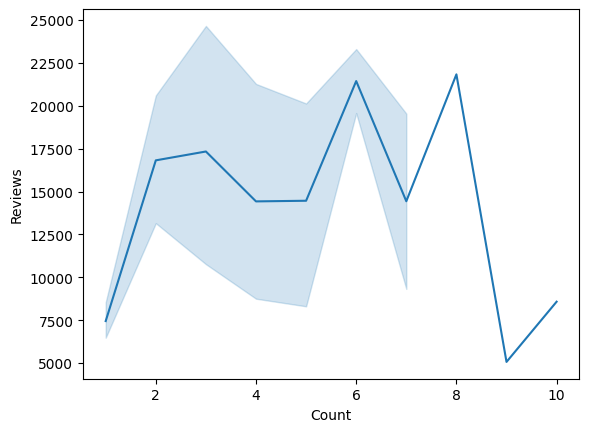

In [22]:
sns.lineplot(names_and_reviews, x="Count", y="Reviews")

<Axes: xlabel='Count', ylabel='Reviews'>

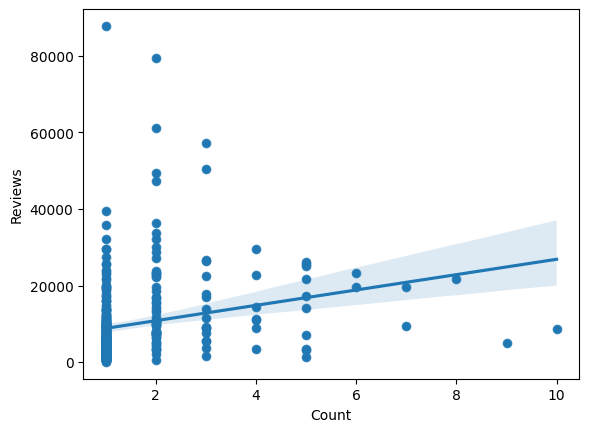

In [24]:
sns.scatterplot(names_and_reviews, x="Count", y="Reviews" )
sns.regplot(names_and_reviews, x="Count", y="Reviews")

<Axes: xlabel='Count', ylabel='Count'>

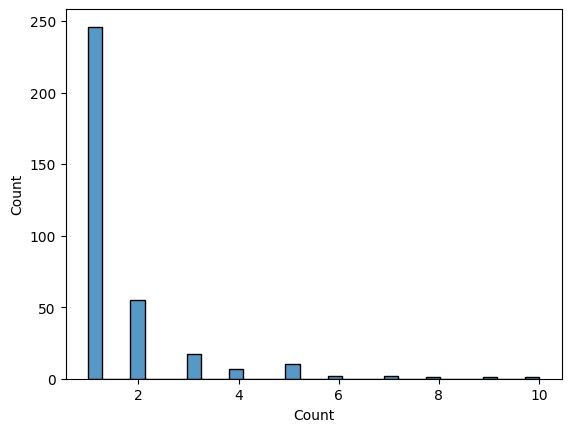

In [29]:
sns.histplot(names_and_reviews, x="Count")

Aktuell wird die Klasse Count = 1 immer dominieren, da viel mehr Beobachtunge vorhanden sind. Wenn wir Aussagen über den Zusammenhang von Count und Reviews treffen wollen, hilft es, gleiche Skalenniveaus zu haben. In diesem Fall bedeutet das, dass wir am liebesten gleich viele Beobachten für die verschiedenen Counts haben. 

Dadurch hätte jeder Count den gleichen Einfluss, beispielweise bei einer Regression.

Es gibt 2 Methoden, um die Anazhl der Beobachtungen anzupassen: Up- und Downsampling.

Beim Downsampling reduzieren wir die Anzahl unserer Beobachtungen auf das Niveau der restlichen Klassen (in diesem Fall Counts). 

Beim Upsampling erhöhen wir künstlich die Anzahl der Beobachtungen.

Oftmals wird statt Up- und Downsampling auch direkt der Begriff Resampling verwendet.

Wichtig ist, dass wir die zugrundeliegende Verteilung kennen und nicht verändern.

<Axes: xlabel='Reviews', ylabel='Count'>

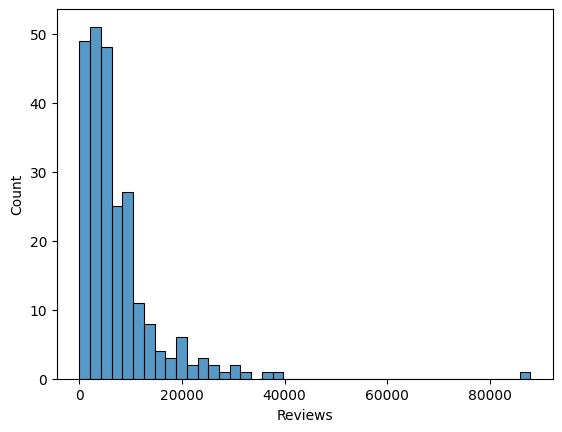

In [ ]:
sns.histplot(names_and_reviews[names_and_reviews["Count"] == 1], x="Reviews")

In [66]:
names_and_reviews_count2 = names_and_reviews[names_and_reviews["Count"] == 2]
names_and_reviews_count2.shape

(55, 3)

In [67]:
from sklearn.utils import resample

names_and_reviews_count1 = names_and_reviews[names_and_reviews["Count"] == 1]

names_and_reviews_count1_resampled = resample(
    names_and_reviews_count1, replace=False, n_samples=55, random_state=73)

<Axes: xlabel='Reviews', ylabel='Count'>

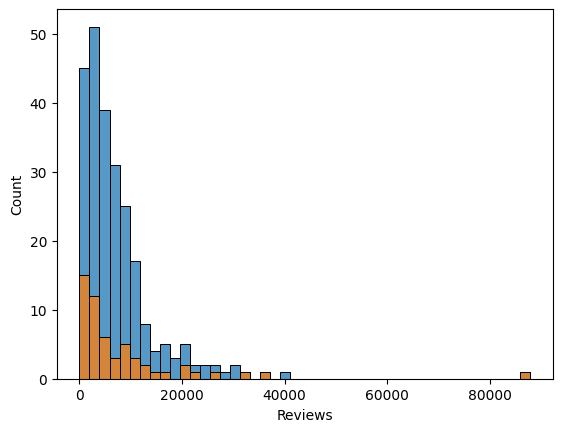

In [68]:
sns.histplot(names_and_reviews[names_and_reviews["Count"] == 1], x="Reviews", bins=45)
sns.histplot(names_and_reviews_count1_resampled, x="Reviews", bins=45)

<Axes: xlabel='Count', ylabel='Reviews'>

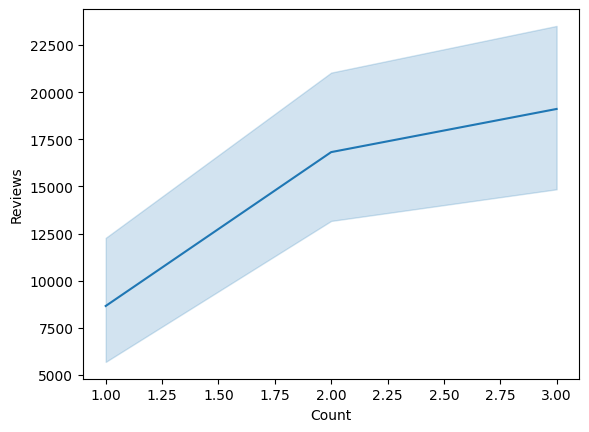

In [79]:
# resample names_and_reviews so that frequency of count is equal
# Resample names_and_reviews so that frequency of count is equal
count_1 = names_and_reviews[names_and_reviews["Count"] == 1]
count_2 = names_and_reviews[names_and_reviews["Count"] == 2]
count_3 = names_and_reviews[names_and_reviews["Count"] == 3]

n_samples = len(count_2)

resampled_count_1 = resample(count_1, replace=False, n_samples=n_samples, random_state=73)
resampled_count_2 = resample(count_2, replace=False, n_samples=n_samples, random_state=73)
resampled_count_3 = resample(count_3, replace=True, n_samples=n_samples, random_state=73)

data = pd.concat([resampled_count_1, resampled_count_2, resampled_count_3])
sns.lineplot(data, x="Count", y="Reviews")